In [1]:
import numpy as np 

def file_data(file_name = 'heightWeightData.txt'):
    
    with open(file_name) as file: #standard python I/O for text files 
        contents = file.read()
        
    l = contents.split('\n')[:-1] #first we split the string into list of substrings with each substring reprsenting a vector"
    
    dataset = [] #creating a list to extract and store data from 'l' 
    
    for vector in l : #for each row we split and map the string data and store it.
        data = list(map(int, vector.split(',')))
        dataset.append(data)
    
    dataset = np.array(dataset).reshape(len(dataset), 3) #it is easier to handle the numpy arrays so we will typecast and reshape the data.
    
     
    return dataset #returning the formatted dataset 

In [2]:
#driver_code : 

s = file_data()

In [3]:
s

array([[  1,  67, 125],
       [  2,  68, 140],
       [  2,  67, 142],
       [  2,  60, 110],
       [  2,  64,  97],
       [  2,  61, 106],
       [  1,  79, 210],
       [  2,  61, 110],
       [  1,  71, 150],
       [  2,  66, 145],
       [  2,  60, 113],
       [  1,  71, 175],
       [  1,  72, 145],
       [  2,  55, 110],
       [  2,  64, 112],
       [  2,  65, 135],
       [  2,  65, 135],
       [  2,  71, 140],
       [  2,  68, 130],
       [  1,  71, 152],
       [  2,  67, 127],
       [  1,  70, 143],
       [  2,  68, 165],
       [  1,  72, 160],
       [  1,  71, 185],
       [  2,  65, 114],
       [  2,  67, 116],
       [  2,  66, 113],
       [  2,  63, 145],
       [  2,  62, 116],
       [  1,  71, 155],
       [  2,  64, 107],
       [  2,  64, 104],
       [  2,  69, 137],
       [  1,  75, 200],
       [  1,  65, 150],
       [  2,  67, 140],
       [  2,  65, 125],
       [  1,  75, 240],
       [  2,  57, 140],
       [  1,  68, 135],
       [  1,  73

In [4]:
def extract_males(dataset):
    return dataset[dataset[:, 0]==1][:, 1:] #as we have to check for each row if the data in first column == 1 or not and then grab the rest two rows if true.

In [5]:
#driver_code :

male_data = extract_males(s)

In [6]:
def stats(dataset = male_data): #calculating the required statistics from the data 
    return [['mean_weight', np.mean(dataset[:, 0])], ['mean_height', np.mean(dataset[:, 1])], ['weight_std', np.std(dataset[:,0])], ['height_std', np.std(dataset[:,1])], ['covariance', np.cov(dataset[:,0], dataset[:,1])]]

In [7]:
#driver_code : 

statistics = stats()

In [8]:
statistics

[['mean_weight', 71.65753424657534],
 ['mean_height', 175.6164383561644],
 ['weight_std', 3.106419240122382],
 ['height_std', 32.17572902048413],
 ['covariance',
  array([[   9.78386606,   47.5890411 ],
         [  47.5890411 , 1049.65639269]])]]

In [9]:
np.cov(male_data[:,0], male_data[:,1])

array([[   9.78386606,   47.5890411 ],
       [  47.5890411 , 1049.65639269]])

# two dimensional gaussian : 

$$f(x, y) = A \,exp(-(\frac{(x-\bar{x})^2}{2 {\sigma_{X}}^2} + \frac{(y-\bar{y})^2}{2 {\sigma_{Y}}^2})$$

$$ cov(X,Y) = 
\begin{bmatrix}
 \sigma_{X} & \sigma_{X,Y} \\ 
 \sigma_{X,Y}& \sigma_{Y}
\end{bmatrix}
$$

Text(0, 0.5, 'height')

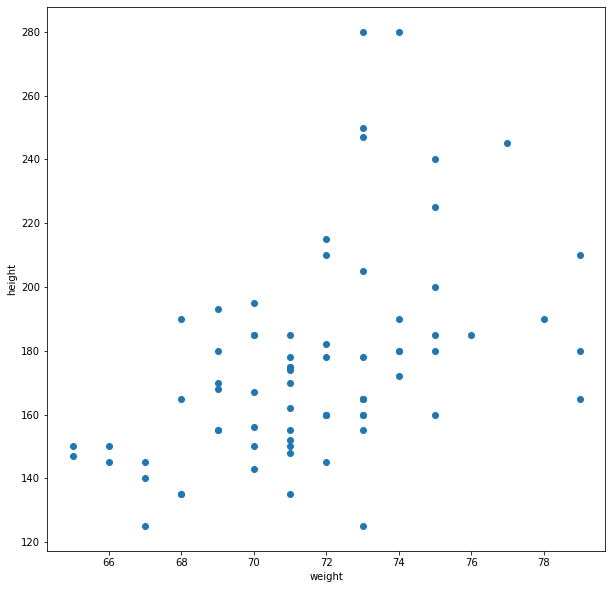

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.scatter(male_data[:, 0], male_data[:, 1])
plt.xlabel('weight')
plt.ylabel('height')

# confidence ellipse: 

basically when we project a multivariate gaussian on the x-y plane we get contours that look like ellipses, these are known as confidence ellipses ; here in the problem we first need to find the orientation of axes of the ellipse and then the magnitude of the semi axes of the ellipse to sketch it with the scatter plot.

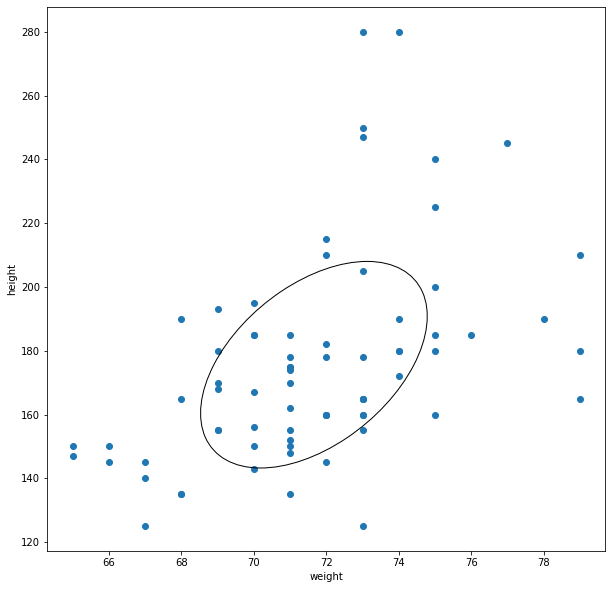

In [11]:
from matplotlib.patches import Ellipse
plt.figure(figsize=(10,10))

def eigsorted(cov):
    
    # for creation of the confidence ellipse we need the eigen values of the covariance matrix to find the orientation and the semi axes of the ellipse
    
    vals, vecs = np.linalg.eigh(cov)
    order = vals.argsort()[::-1]
    return vals[order], vecs[:,order]

x = male_data[:,0] # x column vector 
y = male_data[:,1] # y column vector 

nstd = 1 # multiplier like we need the contour with deviation = multiplier * std
ax = plt.subplot(111)

cov = np.cov(x, y) # calculating the 2x2 covariance matrix of the data with 2 features 

vals, vecs = eigsorted(cov)
theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))

w, h = 2 * nstd * np.sqrt(vals)
ell = Ellipse(xy=(np.mean(x), np.mean(y)),
              width=w, height=h,
              angle=theta, color='black')

ell.set_facecolor('none')
ax.add_artist(ell)
plt.scatter(x, y)
plt.xlabel('weight')
plt.ylabel('height')
plt.show()

# Standardising The Data : 

from the original data set we replace each point with a new scaled point  so the the resulting distribution is that with a $ \, \mu = 0 $ and $\sigma^2 = 1$

$$\, x_{new} = \frac{x_{old}-\mu_{x}}{\sigma_{x}}\,$$

In [12]:
def scaler(data, mean, std):
    return np.array(list(map(lambda x: (x-mean)/std ,data))).reshape(len(data),1)

In [13]:
scaled_heights = scaler(male_data[:,0], np.mean(male_data[:,0]), np.std(male_data[:,0]))

In [14]:
scaled_weights = scaler(male_data[:,1], np.mean(male_data[:,1]), np.std(male_data[:,1]))

In [15]:
scaled_male_data = np.concatenate([scaled_heights, scaled_weights], axis=1)

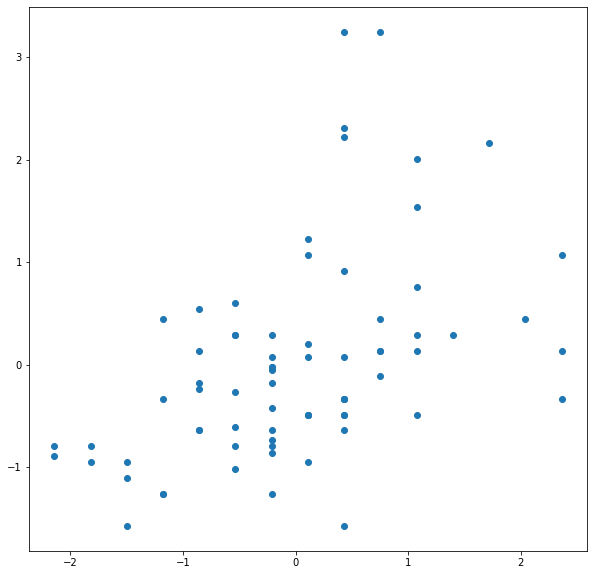

In [16]:
plt.figure(figsize=(10,10))
plt.scatter(scaled_male_data[:,0], scaled_male_data[:,1])

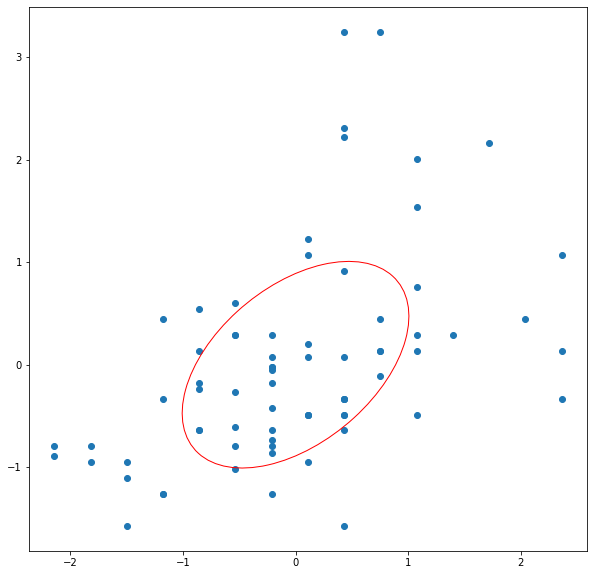

In [17]:
plt.figure(figsize=(10,10))

x = scaled_male_data[:,0] # x column vector 
y = scaled_male_data[:,1] # y column vector 

nstd = 1 # multiplier like we need the contour with deviation = multiplier * std
ax = plt.subplot(111)

cov = np.cov(x, y) # calculating the 2x2 covariance matrix of the data with 2 features 

vals, vecs = eigsorted(cov)
theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))

w, h = 2 * nstd * np.sqrt(vals)
ell = Ellipse(xy=(np.mean(x), np.mean(y)),
              width=w, height=h,
              angle=theta, color='red')

ell.set_facecolor('none')
ax.add_artist(ell)
plt.scatter(x, y)


* <b>it can be seen that the two ellipses in the scaled and the unscaled version don't change orientation or size but the plot is scaled.</b>

# Whitening The Data : 

$$\hat{x} = \Lambda^{\frac{-1}{2}} U^{T} x$$

In [18]:
def whiten(data,fudge=0):

    # the matrix X should be observations-by-components

    # get the covariance matrix
    
    data_cov = np.cov(data[:,0], data[:,1])

    # eigenvalue decomposition of the covariance matrix
    d, V = np.linalg.eigh(data_cov)

    # a fudge factor can be used so that eigenvectors associated with
    # small eigenvalues do not get overamplified.
   
    D = np.diag(1. / np.sqrt(d+fudge))

    # whitening matrix
    W = np.dot(np.dot(V, D), V.T)

    # multiply by the whitening matrix
    data_white = np.dot(data, W)

    return data_white, W

In [19]:
X,y = whiten(male_data)

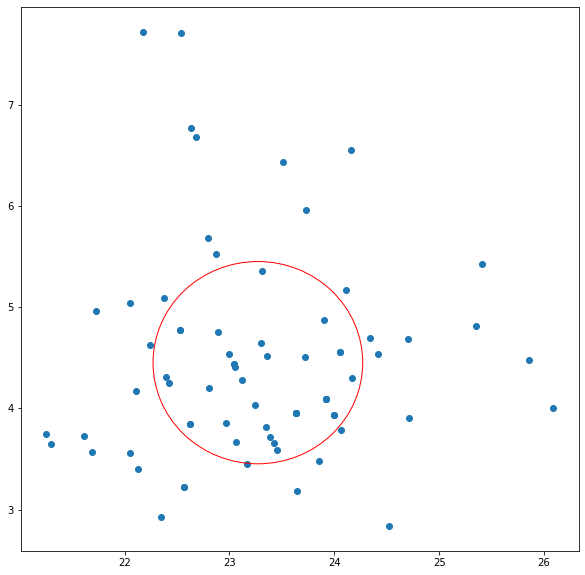

In [20]:
plt.figure(figsize=(10,10))

x = X[:,0] # x column vector, in this case the height vector 
y = X[:,1] # y column vector, in this case the weight vector 

nstd = 1 # multiplier like we need the contour with deviation = multiplier * std

ax = plt.subplot(111)

cov = np.cov(x, y) # calculating the 2x2 covariance matrix of the data with 2 features 

vals, vecs = eigsorted(cov)
theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))

w, h = 2 * nstd * np.sqrt(vals)
ell = Ellipse(xy=(np.mean(x), np.mean(y)),
              width=w, height=h,
              angle=theta, color='red')

ell.set_facecolor('none')
ax.add_artist(ell)
plt.scatter(x, y)
plt.show()